In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
def load_dataset(fname):
    data = pd.read_csv(fname, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

In [22]:
X, y = load_dataset("pima-indians-diabetes.csv")

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Train of X: {X_train.shape}, y: {y_train.shape}")
print(f"Test of X: {X_test.shape}, y: {y_test.shape}")

Train of X: (514, 8), y: (514,)
Test of X: (254, 8), y: (254,)


#### ANOVA Feature Selection

In [24]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

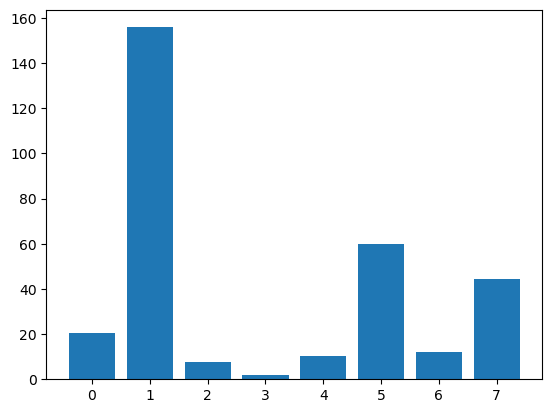

In [25]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [28]:
model_1 = LogisticRegression(solver='liblinear')
model_1

LogisticRegression(solver='liblinear')

In [30]:
model_1.fit(X_train, y_train)
yhat = model_1.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print("accuracy: %.2f" %(accuracy*100))

accuracy: 76.77


In [31]:
model_2 = LogisticRegression(solver='liblinear')
model_2

LogisticRegression(solver='liblinear')

In [32]:
model_2.fit(X_train_fs, y_train)
yhat = model_2.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: %.2f" %(accuracy*100))

Accuracy: 74.80
